# NCA5 Hydrogen Senky Diagram
Looking at data from Princeton Net-Zero America: https://netzeroamerica.princeton.edu/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.sankey import Sankey

GWh_per_PJ = 277.778

In [2]:
df20 = pd.read_csv('nzap-data-2050.csv')
print(len(df20.index))

6438


In [3]:
df20 = df20[ df20['scenario'] == 'E+RE+']
print(len(df20.index))

1075


In [4]:
df20

,filter_level_1,filter_level_2,filter_level_3,variable_name,unit,value,scenario,year,geo
5,MACRO RESULTS,Primary energy,NaN,Biomass,EJ,12.27907,E+RE+,2050,national
6,MACRO RESULTS,Primary energy,NaN,Coal and Coke,EJ,0.00074,E+RE+,2050,national
15,MACRO RESULTS,Primary energy,NaN,Geothermal,EJ,0.10748,E+RE+,2050,national
21,MACRO RESULTS,Primary energy,NaN,Hydro,EJ,1.06770,E+RE+,2050,national
27,MACRO RESULTS,Primary energy,NaN,Natural Gas,EJ,0.02198,E+RE+,2050,national
...,...,...,...,...,...,...,...,...,...
6408,IMPACTS,Health,Cumulative avoided premature deaths from air p...,Cumulative avoided premature deaths from air p...,avoided deaths,15307.23738,E+RE+,2050,national
6415,IMPACTS,Health,Cumulative avoided premature deaths from air p...,Cumulative avoided premature deaths from air p...,avoided deaths,2721.08958,E+RE+,2050,national
6420,IMPACTS,Health,Cumulative avoided premature deaths from air p...,Cumulative avoided premature deaths from air p...,avoided deaths,2242.57844,E+RE+,2050,national
6428,IMPACTS,Health,Cumulative avoided premature deaths from air p...,Cumulative avoided premature deaths from air p...,avoided deaths,1513.73756,E+RE+,2050,national




2050: E+RE+
1.92500154 Production - SMR 6.93 1
4.0555588 Production - ATR 14.6 -1
104059.53563645082 Production - BECCS-H2 374614.0286 1
1383320.2105441722 Production - Electrolysis 4979948.774 -1
-296.17030631 Bulk chemicals manufacturing 296170.30631 1
-120.29493259 Direct-reduced iron production 120294.93259 -1
-68.89429445 Gas turbine fuel 68894.29445 1
-280.80842236 Gaseous fuels synthesis 280808.42236 -1
-63.13669094 Hythane 63136.69094 1
-10.69905873 Industrial boilers 10699.05873 -1
-3939.80584712 Liquid fuels synthesis 3939805.84712 0
-380.96594311 Medium and heavy fuel cell vehicles 380965.94311 -1
-73.77476596999999 Other industry 73774.76597 1
-119.04682107000001 Other transportation 119046.82107 -1
1487385.726740963 1482032.129658313 -5353.597082650001


2050: E+RE-
847.0377748518999 Production - SMR 3049.33355 1
218399.9173309052 Production - ATR 786239.0734 -1
350218.11489649006 Production - BECCS-H2 1260784.205 1
75608.96357045579 Production - Electrolysis 272192.0511

ZeroDivisionError: float division by zero

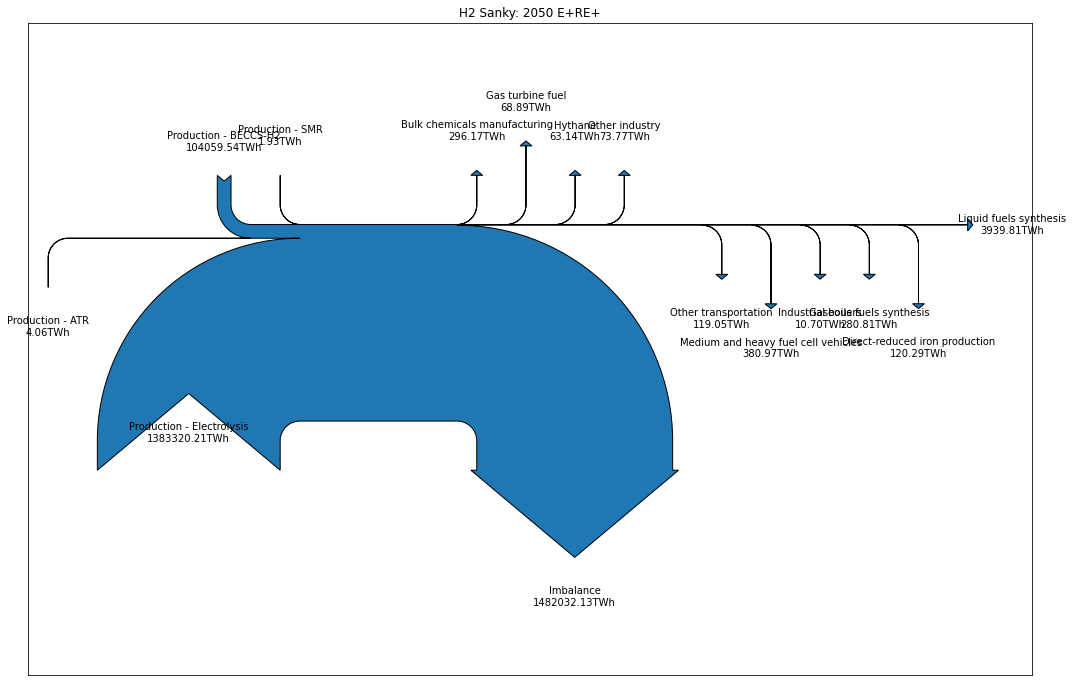

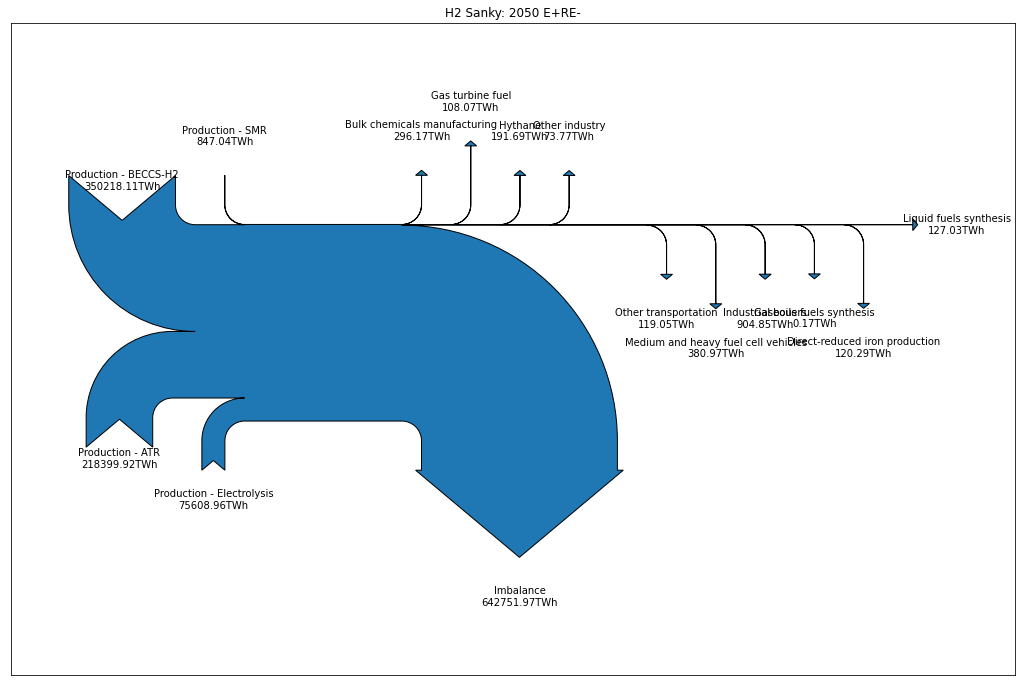

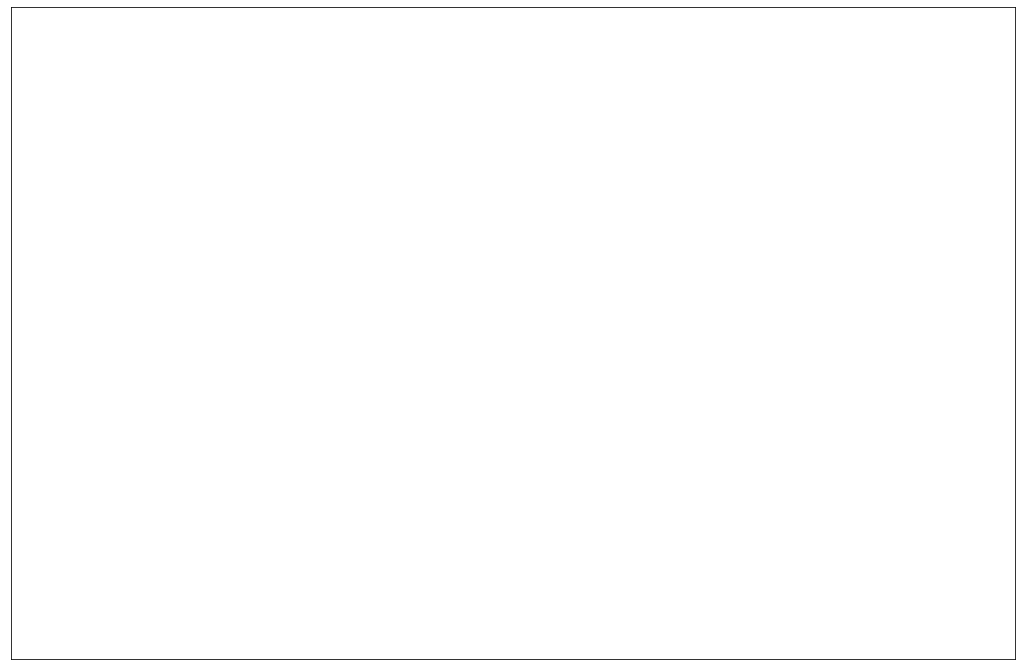

In [14]:
def sanky(year=2050, scenario='E+RE+'):

    print(f"\n\n{year}: {scenario}")
    df = pd.read_csv(f'nzap-data-{year}.csv')

    df = df[ df['scenario'] == scenario]


    flows = []
    labels = []
    orientations = []
    pathlengths = []
    rotate = [-1, 1]
    raw = []

    pos = 0
    neg = 0
    tot = 0
    cnt = 0
    for idx in df.index:
        var_name = df.loc[idx, 'variable_name']
        fl2 = df.loc[idx, 'filter_level_2']
        fl3 = df.loc[idx, 'filter_level_3']
        unit = df.loc[idx, 'unit']
        value = df.loc[idx, 'value'] / 1000 # Into TWh or TJ
        if np.isnan(value):
            continue
        if 'Hydrogen' in fl2:
            #or 'h2' in var_name or 'H2' in var_name or 'hydrogen' in var_name or 'Hydrogen' in var_name:
            #print(df.loc[idx])
            if 'Production' in fl3:
            #if 'By source' in fl3:
                val = value * GWh_per_PJ
                flows.append(val)
                tot += val
                pos += val
                labels.append(var_name.replace('By source - ',''))
                if labels[-1] == 'Electricity':
                    orientations.append(0)
                else:
                    orientations.append( rotate[cnt%2 - 1])
            elif 'Uses' in fl3:
                val = value
                flows.append(-1 * val)
                tot -= val
                neg -= val
                labels.append(var_name.replace('Uses - ',''))
                if labels[-1] == 'Liquid fuels synthesis':
                    orientations.append(0)
                else:
                    orientations.append( rotate[cnt%2 - 1])
            else:
                continue
            raw.append(df.loc[idx, 'value'])
            appended = False
            for V in ['iron', 'Gaseous fuel synthesis', 'fuel cell vehicles', 'turbine']:
                if V in var_name:
                    pathlengths.append(0.4)
                    appended = True
            if not appended:
                pathlengths.append(0.25)
            cnt += 1
            #print(f"{idx}, {fl2}, {fl3}, {var_name}, {value} {unit}/1000")
    flows.append(-1 * tot)
    labels.append('Imbalance')
    orientations.append(-1)
    pathlengths.append(0.25)
    for F, L, R, O in zip(flows, labels, raw, orientations):
        print(F, L, R, O)
    print(pos, tot, neg)

    sf=1.5
    fig = plt.figure(figsize=(12*sf,8*sf))
    ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
    sankey = Sankey(ax=ax, scale=1./pos, offset=0.2,
                    format='%.2f', unit='TWh')
    sankey.add(flows=flows,
        labels=labels,
        orientations=orientations,
        pathlengths=pathlengths).finish()
    plt.title(f"H2 Sanky: {year} {scenario}")
    plt.savefig(f"{year}_{scenario}.png")
    return


sanky(2050, 'E+RE+')
sanky(2050, 'E+RE-')
sanky(2020, 'REF')